In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup
import ssl
import json
import csv

## Reading a CSV file from a URL

In [76]:
movies = pd.read_csv("http://cs.luther.edu/~leekent/movies.csv")

## Scatter Plot

Here a scatter plot is created by specifying the x-axis and y-axis as two columns from a Dataframe. The x-axis is seen to be a time series by matplotlib and so the time is split into 5 equal parts with labels in between.

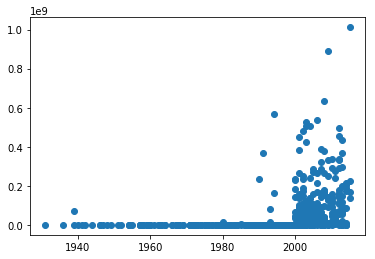

In [77]:
plt.scatter("Year", "AdjustedGross", data=movies)

## Using a criteria to select rows from the Dataframe

The boMovies is also a Dataframe but is a subset of the original.

In [78]:
criteria1 = movies.AdjustedGross > 0
criteria1.head()
boMovies = movies[criteria1]
len(boMovies)

234

So, plotting the subset eliminates all the zero box office values.

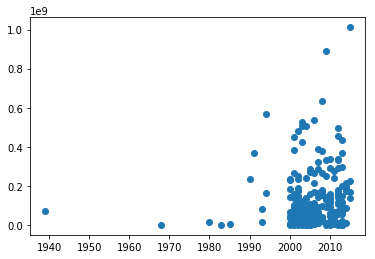

In [79]:
plt.scatter("Year", "AdjustedGross", data=boMovies)

## Categorical Plotting

When you don't have numerical data in a column, it is called categorical data. Categorical data is automatically detected and used as a sequence of values in a plot. 

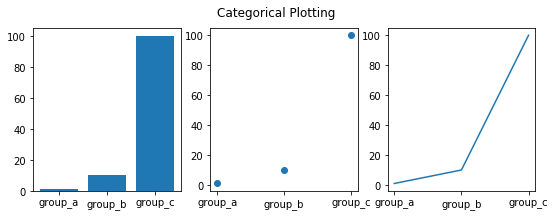

In [80]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(1, figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

## Defining Our Own Categorical Sequence

Here we define directorCounts. Categorical data is data that takes on a limited or fixed number of possible values. Sometimes those values may be numeric. Other times they are text-based. For example blood type, or director in the movie data set. Most importantly, categorical data is not supposed to be interpolated between values. So, for instance, you would not create a standard plot of categorical data because a line between categories does not make sense. 

In [81]:
directorCounts = movies["Director"].value_counts()

In [82]:
multiDirector = directorCounts[directorCounts.values > 3]
type(multiDirector)

pandas.core.series.Series

In [83]:
print(type(multiDirector.index))
print(type(multiDirector.values))

<class 'pandas.core.indexes.base.Index'>
<class 'numpy.ndarray'>


Since the director names are the index and the values are numeric, Pandas doesn't recognize either of them as a categorical type. However, an index is always categorical and the data in this case could be seen as non-categorical since we can compare one director against another.

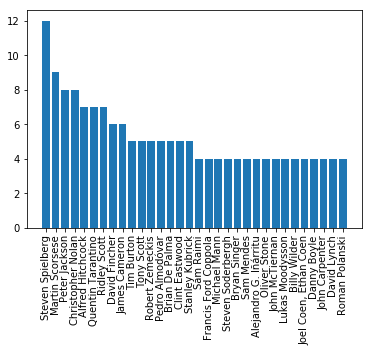

In [84]:
plt.bar(multiDirector.index, multiDirector)
plt.xticks(multiDirector.index, multiDirector.index, rotation='vertical')
plt.show()

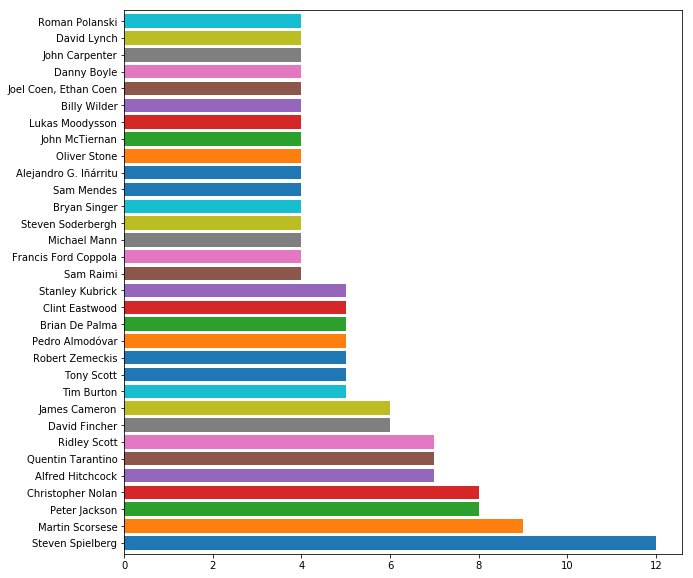

In [85]:
multiDirector.plot(kind="barh",width=0.8, figsize=(10,10))

In [86]:
criteria1 = movies.AdjustedGross > 0
criteria1.head()
boMovies = movies[criteria1]
print(len(boMovies))
boMovies

234


,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,AdjustedGross
2,Star Wars: Episode V - The Empire Strikes Back,1980,PG,20 Jun 1980,124 min,"Action, Adventure, Fantasy",Irvin Kershner,"Leigh Brackett (screenplay by), Lawrence Kasda...","Mark Hamill, Harrison Ford, Carrie Fisher, Bil...",After the rebels are brutally overpowered by t...,...,8.8,"1,002,905",tt0080684,movie,21 Sep 2004,4548170.0,Twentieth Century Fox,http://www.starwars.com/episode-v/,True,1.473607e+07
8,The Lord of the Rings: The Return of the King,2003,PG-13,17 Dec 2003,201 min,"Action, Adventure, Drama",Peter Jackson,"J.R.R. Tolkien (novel), Fran Walsh (screenplay...","Noel Appleby, Ali Astin, Sean Astin, David Aston",Gandalf and Aragorn lead the World of Men agai...,...,8.9,"1,424,665",tt0167260,movie,25 May 2004,364000000.0,New Line Cinema,http://www.lordoftherings.net/,True,5.059600e+08
10,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker emerges fro...,...,9.0,"1,969,949",tt0468569,movie,09 Dec 2008,533316061.0,Warner Bros. Pictures/Legendary,http://thedarkknight.warnerbros.com/,True,6.346461e+08
14,Inception,2010,PG-13,16 Jul 2010,148 min,"Action, Adventure, Sci-Fi",Christopher Nolan,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",A thief who steals corporate secrets through t...,...,8.8,"1,745,967",tt1375666,movie,07 Dec 2010,292568851.0,Warner Bros. Pictures,http://inceptionmovie.warnerbros.com/,True,3.393799e+08
15,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,19 Dec 2001,178 min,"Adventure, Drama, Fantasy",Peter Jackson,"J.R.R. Tolkien (novel), Fran Walsh (screenplay...","Alan Howard, Noel Appleby, Sean Astin, Sala Baker",A meek Hobbit from the Shire and eight compani...,...,8.8,"1,441,532",tt0120737,movie,06 Aug 2002,314000000.0,New Line Cinema,http://www.lordoftherings.net/film/trilogy/the...,True,4.521600e+08
22,The Lord of the Rings: The Two Towers,2002,PG-13,18 Dec 2002,179 min,"Adventure, Drama, Fantasy",Peter Jackson,"J.R.R. Tolkien (novel), Fran Walsh (screenplay...","Bruce Allpress, Sean Astin, John Bach, Sala Baker",While Frodo and Sam edge closer to Mordor with...,...,8.7,"1,287,948",tt0167261,movie,26 Aug 2003,339700000.0,New Line Cinema,http://www.lordoftherings.net/,True,4.823740e+08
23,Terminator 2,1991,R,03 Jul 1991,137 min,"Action, Sci-Fi",James Cameron,"James Cameron, William Wisher","Arnold Schwarzenegger, Linda Hamilton, Edward ...","A cyborg, identical to the one who failed to k...",...,8.5,"866,213",tt0103064,movie,31 Mar 1998,198116802.0,TriStar Pictures,NaN,True,3.704784e+08
30,The Lion King,1994,G,24 Jun 1994,88 min,"Animation, Adventure, Drama","Roger Allers, Rob Minkoff","Irene Mecchi (screenplay by), Jonathan Roberts...","Rowan Atkinson, Matthew Broderick, Niketa Cala...",A Lion cub crown prince is tricked by a treach...,...,8.5,"787,506",tt0110357,movie,07 Oct 2003,94240635.0,Buena Vista,http://disney.go.com/lionking/,True,1.620939e+08
34,Back to the Future,1985,PG,03 Jul 1985,116 min,"Adventure, Comedy, Sci-Fi",Robert Zemeckis,"Robert Zemeckis, Bob Gale","Michael J. Fox, Christopher Lloyd, Lea Thompso...","Marty McFly, a 17-year-old high school student...",...,8.5,"886,311",tt0088763,movie,17 Dec 2002,2925880.0,Universal Pictures,http://www.bttfmovie.com/,True,6.992853e+06
37,Memento,2000,R,25 May 2001,113 min,"Mystery, Thriller",Christopher Nolan,"Christopher Nolan (screenplay), Jonathan Nolan...","Guy Pearce, Carrie-Anne Moss, Joe Pantoliano, ...",A man with short-term memory loss attempts to ...,...,8.5,"990,039",tt0209144,movie,04 Sep 2001,23844220.0,Newmarket Films,http://www.otnemem.com,True,3.552789e+07


In [87]:
movieProd = boMovies[["Production","AdjustedGross"]]
print(type(movieProd))
print(movieProd["Production"].nbytes)

<class 'pandas.core.frame.DataFrame'>
1872


In [88]:
movieProd

,Production,AdjustedGross
2,Twentieth Century Fox,1.473607e+07
8,New Line Cinema,5.059600e+08
10,Warner Bros. Pictures/Legendary,6.346461e+08
14,Warner Bros. Pictures,3.393799e+08
15,New Line Cinema,4.521600e+08
22,New Line Cinema,4.823740e+08
23,TriStar Pictures,3.704784e+08
30,Buena Vista,1.620939e+08
34,Universal Pictures,6.992853e+06
37,Newmarket Films,3.552789e+07


**We can save some space in fields that could be classified as categorical data. The Production company is categorical. There are a limited number of different production companies. The following syntax allows us to specify what columns should be converted in a Dataframe. This shows a savings of over 1000 bytes of storage. Not much in this example, but it can be a lot in large datasets.**

In [89]:
movieProd = movieProd.astype({'Production':'category'})

In [90]:
movieProd["Production"].nbytes

818

In [91]:
movieProd

,Production,AdjustedGross
2,Twentieth Century Fox,1.473607e+07
8,New Line Cinema,5.059600e+08
10,Warner Bros. Pictures/Legendary,6.346461e+08
14,Warner Bros. Pictures,3.393799e+08
15,New Line Cinema,4.521600e+08
22,New Line Cinema,4.823740e+08
23,TriStar Pictures,3.704784e+08
30,Buena Vista,1.620939e+08
34,Universal Pictures,6.992853e+06
37,Newmarket Films,3.552789e+07


In [92]:
totalGrossByProd = movieProd.groupby(["Production"]).sum().sort_values("AdjustedGross",ascending=False).head(20)
totalGrossByProd

,AdjustedGross
Production,
Warner Bros. Pictures,3.791130e+09
20th Century Fox,2.685611e+09
Universal Pictures,2.677501e+09
Walt Disney Pictures,2.518405e+09
Sony Pictures,1.895385e+09
New Line Cinema,1.588171e+09
Paramount Pictures,1.576056e+09
Buena Vista,1.234585e+09
Warner Bros.,9.420748e+08


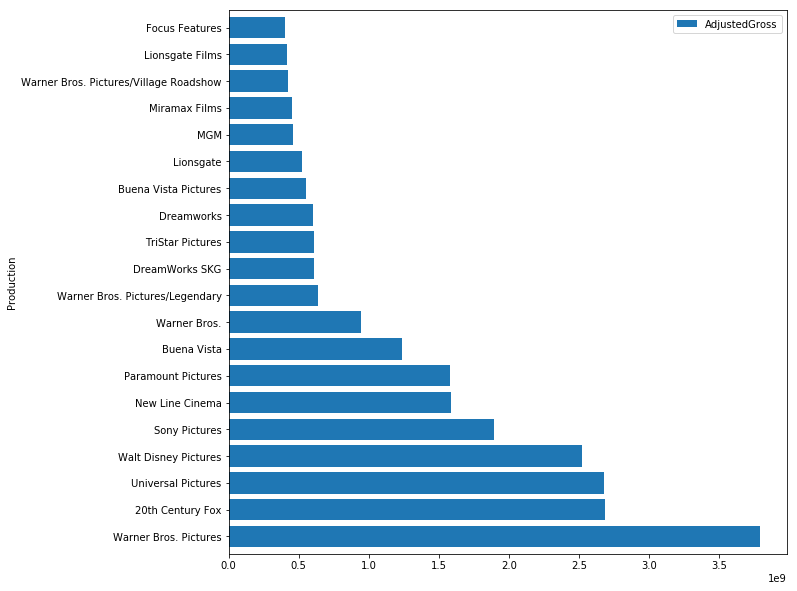

In [93]:
totalGrossByProd.plot(kind="barh",width=0.8, figsize=(10,10))

In [94]:
print(type(totalGrossByProd))
print(totalGrossByProd.index)

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex(['Warner Bros. Pictures', '20th Century Fox',
                  'Universal Pictures', 'Walt Disney Pictures',
                  'Sony Pictures', 'New Line Cinema', 'Paramount Pictures',
                  'Buena Vista', 'Warner Bros.',
                  'Warner Bros. Pictures/Legendary', 'DreamWorks SKG',
                  'TriStar Pictures', 'Dreamworks', 'Buena Vista Pictures',
                  'Lionsgate', 'MGM', 'Miramax Films',
                  'Warner Bros. Pictures/Village Roadshow', 'Lionsgate Films',
                  'Focus Features'],
                 categories=['20th Century Fox', 'Artisan Entertainment', 'Buena Vista', 'Buena Vista Distribution Compa', 'Buena Vista Pictures', 'CBS Films', 'Columbia Pictures', 'Dimension Films', ...], ordered=False, name='Production', dtype='category')


## Finding the Adjusted Gross by Year per Production Company (the top 4 only)

To do this efficiently we will join two dataframes and then we will need to group by and sum to get the total. In the end I would like to display a stacked area chart. I googled a stacked area chart and came up with this example.

In [95]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

In [96]:
df

,a,b,c,d
0,0.073916,0.208887,0.924713,0.422467
1,0.610907,0.818479,0.194011,0.502690
2,0.764206,0.256175,0.292047,0.731112
3,0.434535,0.616275,0.160898,0.639565
4,0.631955,0.985943,0.682455,0.025877
5,0.843067,0.713818,0.616308,0.262929
6,0.359170,0.957779,0.372952,0.710267
7,0.934945,0.661661,0.075241,0.452117
8,0.304868,0.631879,0.659478,0.521232
9,0.912952,0.561532,0.965243,0.328152


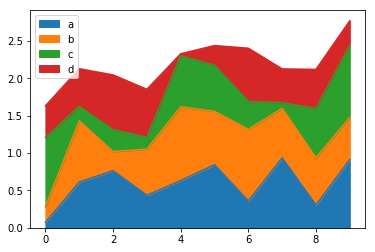

In [97]:
df.plot.area()


**So we need to get our data in this format eventually so we can create this chart. We start by finding the top 4 movie studios according to adjusted gross box office.**

In [98]:
top4 = movieProd.groupby(["Production"]).sum().sort_values("AdjustedGross",ascending=False).head(4)
top4

,AdjustedGross
Production,
Warner Bros. Pictures,3.791130e+09
20th Century Fox,2.685611e+09
Universal Pictures,2.677501e+09
Walt Disney Pictures,2.518405e+09


**We want to select from the dataframe of all movies with box office amounts those from the top 4 production cos.**

In [99]:
boMovies

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,AdjustedGross
2,Star Wars: Episode V - The Empire Strikes Back,1980,PG,20 Jun 1980,124 min,"Action, Adventure, Fantasy",Irvin Kershner,"Leigh Brackett (screenplay by), Lawrence Kasda...","Mark Hamill, Harrison Ford, Carrie Fisher, Bil...",After the rebels are brutally overpowered by t...,...,8.8,"1,002,905",tt0080684,movie,21 Sep 2004,4548170.0,Twentieth Century Fox,http://www.starwars.com/episode-v/,True,1.473607e+07
8,The Lord of the Rings: The Return of the King,2003,PG-13,17 Dec 2003,201 min,"Action, Adventure, Drama",Peter Jackson,"J.R.R. Tolkien (novel), Fran Walsh (screenplay...","Noel Appleby, Ali Astin, Sean Astin, David Aston",Gandalf and Aragorn lead the World of Men agai...,...,8.9,"1,424,665",tt0167260,movie,25 May 2004,364000000.0,New Line Cinema,http://www.lordoftherings.net/,True,5.059600e+08
10,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker emerges fro...,...,9.0,"1,969,949",tt0468569,movie,09 Dec 2008,533316061.0,Warner Bros. Pictures/Legendary,http://thedarkknight.warnerbros.com/,True,6.346461e+08
14,Inception,2010,PG-13,16 Jul 2010,148 min,"Action, Adventure, Sci-Fi",Christopher Nolan,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",A thief who steals corporate secrets through t...,...,8.8,"1,745,967",tt1375666,movie,07 Dec 2010,292568851.0,Warner Bros. Pictures,http://inceptionmovie.warnerbros.com/,True,3.393799e+08
15,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,19 Dec 2001,178 min,"Adventure, Drama, Fantasy",Peter Jackson,"J.R.R. Tolkien (novel), Fran Walsh (screenplay...","Alan Howard, Noel Appleby, Sean Astin, Sala Baker",A meek Hobbit from the Shire and eight compani...,...,8.8,"1,441,532",tt0120737,movie,06 Aug 2002,314000000.0,New Line Cinema,http://www.lordoftherings.net/film/trilogy/the...,True,4.521600e+08
22,The Lord of the Rings: The Two Towers,2002,PG-13,18 Dec 2002,179 min,"Adventure, Drama, Fantasy",Peter Jackson,"J.R.R. Tolkien (novel), Fran Walsh (screenplay...","Bruce Allpress, Sean Astin, John Bach, Sala Baker",While Frodo and Sam edge closer to Mordor with...,...,8.7,"1,287,948",tt0167261,movie,26 Aug 2003,339700000.0,New Line Cinema,http://www.lordoftherings.net/,True,4.823740e+08
23,Terminator 2,1991,R,03 Jul 1991,137 min,"Action, Sci-Fi",James Cameron,"James Cameron, William Wisher","Arnold Schwarzenegger, Linda Hamilton, Edward ...","A cyborg, identical to the one who failed to k...",...,8.5,"866,213",tt0103064,movie,31 Mar 1998,198116802.0,TriStar Pictures,NaN,True,3.704784e+08
30,The Lion King,1994,G,24 Jun 1994,88 min,"Animation, Adventure, Drama","Roger Allers, Rob Minkoff","Irene Mecchi (screenplay by), Jonathan Roberts...","Rowan Atkinson, Matthew Broderick, Niketa Cala...",A Lion cub crown prince is tricked by a treach...,...,8.5,"787,506",tt0110357,movie,07 Oct 2003,94240635.0,Buena Vista,http://disney.go.com/lionking/,True,1.620939e+08
34,Back to the Future,1985,PG,03 Jul 1985,116 min,"Adventure, Comedy, Sci-Fi",Robert Zemeckis,"Robert Zemeckis, Bob Gale","Michael J. Fox, Christopher Lloyd, Lea Thompso...","Marty McFly, a 17-year-old high school student...",...,8.5,"886,311",tt0088763,movie,17 Dec 2002,2925880.0,Universal Pictures,http://www.bttfmovie.com/,True,6.992853e+06
37,Memento,2000,R,25 May 2001,113 min,"Mystery, Thriller",Christopher Nolan,"Christopher Nolan (screenplay), Jonathan Nolan...","Guy Pearce, Carrie-Anne Moss, Joe Pantoliano, ...",A man with short-term memory loss attempts to ...,...,8.5,"990,039",tt0209144,movie,04 Sep 2001,23844220.0,Newmarket Films,http://www.otnemem.com,True,3.552789e+07


**Remember the top4 index is a categorical field**

In [105]:
top4.index

CategoricalIndex(['Warner Bros. Pictures', '20th Century Fox',
                  'Universal Pictures', 'Walt Disney Pictures'],
                 categories=['20th Century Fox', 'Artisan Entertainment', 'Buena Vista', 'Buena Vista Distribution Compa', 'Buena Vista Pictures', 'CBS Films', 'Columbia Pictures', 'Dimension Films', ...], ordered=False, name='Production', dtype='category')

**And the boMovies index right now is not production.**

In [101]:
boMovies.index

Int64Index([  2,   8,  10,  14,  15,  22,  23,  30,  34,  37,
            ...
            476, 483, 486, 488, 490, 491, 492, 495, 496, 499],
           dtype='int64', length=234)

**So we'll make the boMovies have "Production" as its index as well.**

In [109]:
boMovies = boMovies.set_index("Production")

**So now we can select lines from a Dataframe using the following. We get two columns out of the resulting dataframe, plus the index.**

In [110]:
top4ProdMovies = boMovies.loc[boMovies.index.isin(top4.index)]
top4YearAdjustedGross = top4ProdMovies[["Year","AdjustedGross"]]
top4YearAdjustedGross

,Year,AdjustedGross
Production,,
Warner Bros. Pictures,2010,3.393799e+08
Universal Pictures,1985,6.992853e+06
Warner Bros. Pictures,1968,1.002232e+06
Universal Pictures,2006,4.457700e+07
Warner Bros. Pictures,2005,9.306000e+07
20th Century Fox,2012,1.148850e+08
Warner Bros. Pictures,2012,4.974250e+08
Walt Disney Pictures,2015,1.011591e+09
Warner Bros. Pictures,2006,1.680210e+08


**Now we want to get the sum of the adjustedGross column for each of the years.**

In [111]:
top4ProdMovies

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Website,Response,AdjustedGross
Production,,,,,,,,,,,,,,,,,,,,,
Warner Bros. Pictures,Inception,2010,PG-13,16 Jul 2010,148 min,"Action, Adventure, Sci-Fi",Christopher Nolan,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",A thief who steals corporate secrets through t...,...,74.0,8.8,"1,745,967",tt1375666,movie,07 Dec 2010,292568851.0,http://inceptionmovie.warnerbros.com/,True,3.393799e+08
Universal Pictures,Back to the Future,1985,PG,03 Jul 1985,116 min,"Adventure, Comedy, Sci-Fi",Robert Zemeckis,"Robert Zemeckis, Bob Gale","Michael J. Fox, Christopher Lloyd, Lea Thompso...","Marty McFly, a 17-year-old high school student...",...,87.0,8.5,"886,311",tt0088763,movie,17 Dec 2002,2925880.0,http://www.bttfmovie.com/,True,6.992853e+06
Warner Bros. Pictures,2001: A Space Odyssey,1968,G,12 May 1968,149 min,"Adventure, Sci-Fi",Stanley Kubrick,"Stanley Kubrick (screenplay), Arthur C. Clarke...","Keir Dullea, Gary Lockwood, William Sylvester,...",A space-opera spanning the dawn of man to huma...,...,82.0,8.3,"516,610",tt0062622,movie,25 Aug 1998,135620.0,NaN,True,1.002232e+06
Universal Pictures,Children of Men,2006,R,05 Jan 2007,109 min,"Drama, Sci-Fi, Thriller",Alfonso Cuarón,"Alfonso Cuarón (screenplay), Timothy J. Sexton...","Clive Owen, Juan Gabriel Yacuzzi, Michael Cain...","In 2027, in a chaotic world in which women hav...",...,84.0,7.9,"412,021",tt0206634,movie,27 Mar 2007,35100000.0,http://www.childrenofmen.net/,True,4.457700e+07
Warner Bros. Pictures,V for Vendetta,2005,R,17 Mar 2006,132 min,"Action, Drama, Sci-Fi",James McTeigue,"Lilly Wachowski (screenplay), Lana Wachowski (...","Natalie Portman, Hugo Weaving, Stephen Rea, St...","In a future British tyranny, a shadowy freedom...",...,62.0,8.2,"920,722",tt0434409,movie,01 Aug 2006,70500000.0,http://vforvendetta.warnerbros.com/,True,9.306000e+07
20th Century Fox,Life of Pi,2012,PG,21 Nov 2012,127 min,"Adventure, Drama, Fantasy",Ang Lee,"Yann Martel (novel), David Magee (screenplay)","Suraj Sharma, Irrfan Khan, Ayush Tandon, Gauta...",A young man who survives a disaster at sea is ...,...,79.0,7.9,"512,897",tt0454876,movie,12 Mar 2013,103500000.0,http://www.lifeofpimovie.com,True,1.148850e+08
Warner Bros. Pictures,The Dark Knight Rises,2012,PG-13,20 Jul 2012,164 min,"Action, Thriller",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Gary Oldman, Tom Hardy, Joseph...",Eight years after the Joker's reign of anarchy...,...,78.0,8.4,"1,332,466",tt1345836,movie,03 Dec 2012,448130642.0,http://www.thedarkknightrises.com/,True,4.974250e+08
Walt Disney Pictures,Star Wars: The Force Awakens,2015,PG-13,18 Dec 2015,136 min,"Action, Adventure, Fantasy",J.J. Abrams,"Lawrence Kasdan, J.J. Abrams, Michael Arndt, G...","Harrison Ford, Mark Hamill, Carrie Fisher, Ada...","Three decades after the Empire's defeat, a new...",...,81.0,8.0,"755,035",tt2488496,movie,05 Apr 2016,936658640.0,http://starwars.com/,True,1.011591e+09
Warner Bros. Pictures,The Departed,2006,R,06 Oct 2006,151 min,"Crime, Drama, Thriller",Martin Scorsese,"William Monahan (screenplay), Alan Mak, Felix ...","Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",An undercover cop and a mole in the police att...,...,85.0,8.5,"1,026,471",tt0407887,movie,13 Feb 2007,132300000.0,http://www.thedeparted.com/,True,1.680210e+08


In [114]:
top4ByYear = top4YearAdjustedGross.groupby(["Production", "Year"]).sum()
top4ByYear

AdjustedGross
Production            Year               
20th Century Fox      2000   2.335208e+08
                      2001   1.099414e+08
                      2002   3.165526e+08
                      2004   1.055360e+08
                      2005   1.574995e+08
                      2008   1.724599e+08
                      2009   8.921430e+08
                      2011   6.691828e+07
                      2012   4.104969e+08
                      2013   5.293287e+06
                      2014   2.152497e+08
Universal Pictures    1985   6.992853e+06
                      2001   8.975057e+07
                      2002   1.725300e+08
                      2003   1.322193e+08
                      2004   2.394268e+08
                      2005   2.878920e+08
                      2006   3.134088e+08
                      2007   4.469095e+08
                      2008   2.134997e+08
                      2009   1.341171e+08
                      2010   2.917133e+08
                      2012   1.651408e+08
                      2013   9.703369e+07
                      2014   8.686659e+07
Walt Disney Pictures  2003   5.289358e+08
                      2008   2.662623e+08
                      2011   2.748128e+08
                      2013   4.368029e+08
                      2015   1.011591e+09
Warner Bros. Pictures 1939   6.917104e+07
                      1968   1.002232e+06
                      2001   3.247649e+08
                      2002   9.556600e+07
                      2004   1.450070e+08
                      2005   4.328280e+08
                      2006   5.081270e+08
                      2007   3.205000e+08
                      2009   4.578727e+08
                      2010   3.393799e+08
                      2012   6.484066e+08
                      2013   4.485047e+08

**So we want the year only to be the index. We reset level 0 of the index so that only year is the index.**

In [115]:

top4ByYear.reset_index(level=0,inplace=True)
top4ByYear

,Production,AdjustedGross
Year,,
2000,20th Century Fox,2.335208e+08
2001,20th Century Fox,1.099414e+08
2002,20th Century Fox,3.165526e+08
2004,20th Century Fox,1.055360e+08
2005,20th Century Fox,1.574995e+08
2008,20th Century Fox,1.724599e+08
2009,20th Century Fox,8.921430e+08
2011,20th Century Fox,6.691828e+07
2012,20th Century Fox,4.104969e+08


**And now we need to get the production cos to be columns in the table to match our sample stacked area chart format. We do this by using a pivot_table. The pivot_table creates a new dataframe with the columns determined by the values in Production and the values being the AdjustedGross column. The index of the new dataframe is the index of the old dataframe in this case, the Year.**

**However, this results in some NaN's because not every (Year,Production Co) has an AdjustedGross.**

In [116]:
top4ByYearP = top4ByYear.pivot_table(values="AdjustedGross", index=top4ByYear.index, columns="Production")
top4ByYearP

Production,20th Century Fox,Universal Pictures,Walt Disney Pictures,Warner Bros. Pictures
Year,,,,
1939,NaN,NaN,NaN,6.917104e+07
1968,NaN,NaN,NaN,1.002232e+06
1985,NaN,6.992853e+06,NaN,NaN
2000,2.335208e+08,NaN,NaN,NaN
2001,1.099414e+08,8.975057e+07,NaN,3.247649e+08
2002,3.165526e+08,1.725300e+08,NaN,9.556600e+07
2003,NaN,1.322193e+08,5.289358e+08,NaN
2004,1.055360e+08,2.394268e+08,NaN,1.450070e+08
2005,1.574995e+08,2.878920e+08,NaN,4.328280e+08


**So we fill the NaN with 0's. The inplace mutates the object instead of producing a new one. This will be slightly performance advantageous when it is appropriate (i.e. you don't need the original version again).**

In [117]:
top4ByYearP.fillna(0,inplace=True)

In [118]:
top4ByYearP

Production,20th Century Fox,Universal Pictures,Walt Disney Pictures,Warner Bros. Pictures
Year,,,,
1939,0.000000e+00,0.000000e+00,0.000000e+00,6.917104e+07
1968,0.000000e+00,0.000000e+00,0.000000e+00,1.002232e+06
1985,0.000000e+00,6.992853e+06,0.000000e+00,0.000000e+00
2000,2.335208e+08,0.000000e+00,0.000000e+00,0.000000e+00
2001,1.099414e+08,8.975057e+07,0.000000e+00,3.247649e+08
2002,3.165526e+08,1.725300e+08,0.000000e+00,9.556600e+07
2003,0.000000e+00,1.322193e+08,5.289358e+08,0.000000e+00
2004,1.055360e+08,2.394268e+08,0.000000e+00,1.450070e+08
2005,1.574995e+08,2.878920e+08,0.000000e+00,4.328280e+08


**And now we can plot our Stacked Area Graph. This might be better if we started in 1985 as the graph is a bit squished right now.**

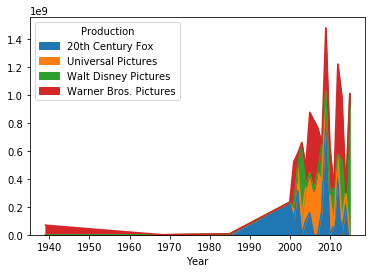

In [119]:
top4ByYearP.plot.area()

**So we must first change the index to int (from str) so we can compare to 1985. This is necessary because as a string 198 is greater than 1975. It is probably not a good idea to compare strings when you mean to compare ints**

In [120]:
top4ByYearP.index = top4ByYearP.index.astype(int)

In [121]:
top4ByYearSince1985 = top4ByYearP[top4ByYearP.index > 1985]
top4ByYearSince1985

Production,20th Century Fox,Universal Pictures,Walt Disney Pictures,Warner Bros. Pictures
Year,,,,
2000,2.335208e+08,0.000000e+00,0.000000e+00,0.000000e+00
2001,1.099414e+08,8.975057e+07,0.000000e+00,3.247649e+08
2002,3.165526e+08,1.725300e+08,0.000000e+00,9.556600e+07
2003,0.000000e+00,1.322193e+08,5.289358e+08,0.000000e+00
2004,1.055360e+08,2.394268e+08,0.000000e+00,1.450070e+08
2005,1.574995e+08,2.878920e+08,0.000000e+00,4.328280e+08
2006,0.000000e+00,3.134088e+08,0.000000e+00,5.081270e+08
2007,0.000000e+00,4.469095e+08,0.000000e+00,3.205000e+08
2008,1.724599e+08,2.134997e+08,2.662623e+08,0.000000e+00


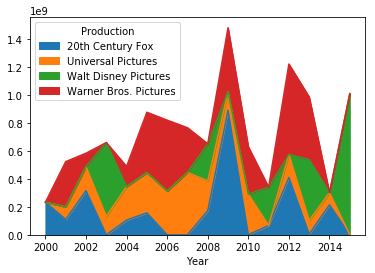

In [122]:
top4ByYearSince1985.plot.area()